# Guia do funcionamento da Simulação do Blind Quantum Computing
##### O documento tem o objetivo de demostrar o funcionamento da simulação dos protocolos Childs e BFK no BQC.
#### IMPORTANDO AS DEPENDÊNCIAS


In [1]:
import random
from quantumnet.components import Network, Host
from quantumnet.components import ServerNode, ClientNode, RegularNode
from quantumnet.objects import Qubit, Logger

##### É inicializada a rede, com uma topologia de grade, que apresenta 1 servidor (nó verde) e 8 clientes (nós vermelhos).

Hosts inicializados
Canais inicializados
Pares EPRs adicionados


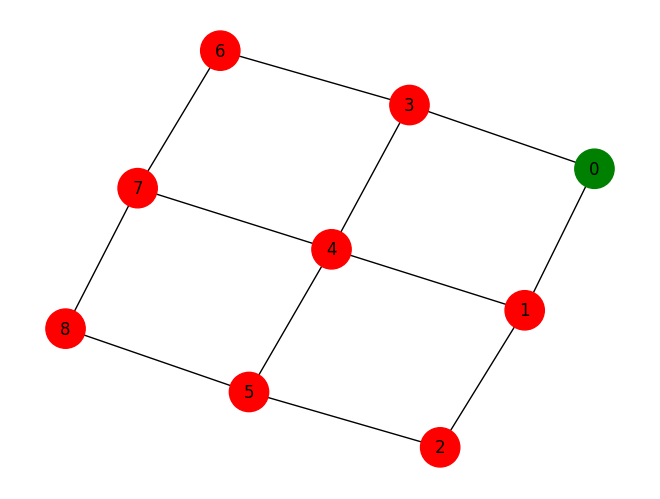

In [2]:
rede = Network()
rede.set_ready_topology('grade',8,3,3)  # Exemplo de uma grade 3x3 com  clientes e 1 servidor
rede.draw()
Logger.activate(Logger)

##### A realização da simulação de uma requesição acontece de forma em que vamos passar uma função para a geração de um circuito aleatório com o número de qubits e número de portas passados como parâmetros e a escolha de um protocolo para executar esse circuito. O protocolo escolhido foi o AC_BQC, Childs, e o cliente é (alice_id).

In [3]:
circuit, num_qubits = rede.generate_random_circuit(num_qubits=5, num_gates=30) 
rede.application_layer.run_app("AC_BQC", alice_id=6, bob_id=0, num_qubits=num_qubits)

                           ┌───┐┌───┐┌───┐   ┌───┐┌───┐        ┌───┐        »
q_0: ─────────■──────────X─┤ Z ├┤ Y ├┤ S ├─X─┤ X ├┤ X ├──────X─┤ X ├──────■─»
     ┌───┐    │          │ ├───┤└───┘└───┘ │ └─┬─┘└─┬─┘      │ └─┬─┘┌───┐ │ »
q_1: ┤ S ├────┼───────X──┼─┤ H ├───────────X───┼────┼────────┼───■──┤ H ├─┼─»
     ├───┤    │ ┌───┐ │  │ └───┘               │    │        │ ┌───┐└───┘ │ »
q_2: ┤ S ├─■──┼─┤ Z ├─┼──┼─────────────────────■────┼────■───X─┤ S ├──────┼─»
     └───┘ │  │ └───┘ │  │                          │  ┌─┴─┐   └───┘      │ »
q_3: ──■───┼──┼───────┼──X───X──────────────────────■──┤ X ├──────────────┼─»
       │   │  │       │      │                         └───┘              │ »
q_4: ──■───■──■───────X──────X────────────────────────────────────────────■─»
                                                                            »
«             ┌───┐┌───┐        
«q_0: ──────X─┤ S ├┤ X ├────────
«     ┌───┐ │ └───┘└───┘   ┌───┐
«q_1: ┤ X ├─┼────────────X─┤ X ├
«     └─┬─

C:\Users\polya\AppData\Roaming\Python\Python311\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)
2024-11-19 18:20:12,919: Circuito aleatório gerado com 5 qubits e 30 portas.
2024-11-19 18:20:12,921: Instrução: {'operation': 'cz', 'qubits': [3, 4]}
2024-11-19 18:20:12,923: Instrução: {'operation': 's', 'qubits': [2]}
2024-11-19 18:20:12,924: Instrução: {'operation': 'cz', 'qubits': [2, 4]}
2024-11-19 18:20:12,925: Instrução: {'operation': 's', 'qubits': [1]}
2024-11-19 18:20:12,930: Instrução: {'operation': 'cz', 'qubits': [0, 4]}
2024-11-19 18:20:12,933: Instrução: {'operation': 'swap', 'qubits': [1, 4]}
2024-11-19 18:20:12,935: Instrução: {'operation': 'swap', 'qubits': [3, 0]}
2024-11-19 18:20:12,93

##### Nesse caso, foi executado o protocolo BFK, com parâmetros como 5 qubits para 5 rounds e 30 portas. Além da escolha de um nó como cliente= alice_id.

In [4]:
circuito, num_qubits = rede.generate_random_circuit(num_qubits=5, num_gates=30)
resultado_bfk = rede.application_layer.run_app("BFK_BQC", alice_id=2, bob_id=0, num_qubits=num_qubits, num_rounds=5)

                                                               ┌───┐   ┌───┐»
q_0: ────X────────────────■────────────■───X───■────────■───■──┤ S ├─X─┤ Z ├»
         │                │     ┌───┐  │   │   │  ┌───┐ │ ┌─┴─┐├───┤ │ └───┘»
q_1: ─■──┼────────■───────┼─────┤ X ├──┼───┼───┼──┤ X ├─┼─┤ X ├┤ H ├─┼──────»
      │  │ ┌───┐  │       │     └─┬─┘┌─┴─┐ │ ┌─┴─┐└─┬─┘ │ └───┘└───┘ │      »
q_2: ─■──┼─┤ X ├──┼───X───■───X───■──┤ X ├─┼─┤ X ├──┼───┼───X────■───┼───X──»
         │ └───┘  │   │ ┌───┐ │ ┌───┐├───┤ │ ├───┤  │   │   │    │   │   │  »
q_3: ────┼────────┼───X─┤ Z ├─X─┤ S ├┤ Z ├─┼─┤ X ├──┼───┼───┼────■───┼───X──»
         │      ┌─┴─┐   └───┘   └───┘└───┘ │ └───┘  │   │   │  ┌───┐ │ ┌───┐»
q_4: ────X──────┤ X ├──────────────────────X────────■───■───X──┤ Z ├─X─┤ T ├»
                └───┘                                          └───┘   └───┘»
«             
«q_0: ────────
«             
«q_1: ──────■─
«     ┌───┐ │ 
«q_2: ┤ S ├─┼─
«     └───┘ │ 
«q_3: ──────┼─
«     ┌───┐ │ 
«q_4: ┤

2024-11-19 18:20:14,113: Circuito aleatório gerado com 5 qubits e 30 portas.
2024-11-19 18:20:14,115: Instrução: {'operation': 'cz', 'qubits': [1, 2]}
2024-11-19 18:20:14,115: Instrução: {'operation': 'x', 'qubits': [2]}
2024-11-19 18:20:14,116: Instrução: {'operation': 'swap', 'qubits': [0, 4]}
2024-11-19 18:20:14,117: Instrução: {'operation': 'swap', 'qubits': [3, 2]}
2024-11-19 18:20:14,122: Instrução: {'operation': 'z', 'qubits': [3]}
2024-11-19 18:20:14,123: Instrução: {'operation': 'cz', 'qubits': [2, 0]}
2024-11-19 18:20:14,124: Instrução: {'operation': 'swap', 'qubits': [3, 2]}
2024-11-19 18:20:14,129: Instrução: {'operation': 's', 'qubits': [3]}
2024-11-19 18:20:14,131: Instrução: {'operation': 'cx', 'qubits': [1, 4]}
2024-11-19 18:20:14,135: Instrução: {'operation': 'cx', 'qubits': [2, 1]}
2024-11-19 18:20:14,136: Instrução: {'operation': 'cx', 'qubits': [0, 2]}
2024-11-19 18:20:14,138: Instrução: {'operation': 'swap', 'qubits': [4, 0]}
2024-11-19 18:20:14,140: Instrução: {'o

##### Nessa função, podemos coletar a métrica da média da fidelidade dos pares EPRs utilizados nas duas requesições.

In [5]:
rede.application_layer.avg_fidelity_on_applicationlayer()

A média das fidelidades das rotas é: 0.7895


0.7895495151132922

##### Além de printar as fidelidades das rotas.

In [6]:
rede.application_layer.print_route_fidelities()

Fidelidades das rotas utilizadas:
0.8668
0.8958
0.8155
0.8862
0.8545
0.7683
0.7940
0.7228
0.7855
0.7574
0.7705
0.7626
0.7334
0.7034
0.7267


##### Pode ser coletado os EPRs utilizados na camada de aplicação, consequentemente nas requesições e protocolos.

In [7]:
#rede.application_layer.print_used_eprs()

In [8]:
rede.get_total_useds_eprs()

2024-11-19 18:20:14,772: Eprs usados na camada PhysicalLayer: 0
2024-11-19 18:20:14,775: Eprs usados na camada LinkLayer: 0
2024-11-19 18:20:14,779: Eprs usados na camada NetworkLayer: 0
2024-11-19 18:20:14,781: Eprs usados na camada ApplicationLayer: 30


30

In [9]:
#taxadesucesso